In [1]:
# Importing libraries
import cv2 as cv 
import matplotlib.pyplot as plt

(512, 512, 3)
(512, 512)


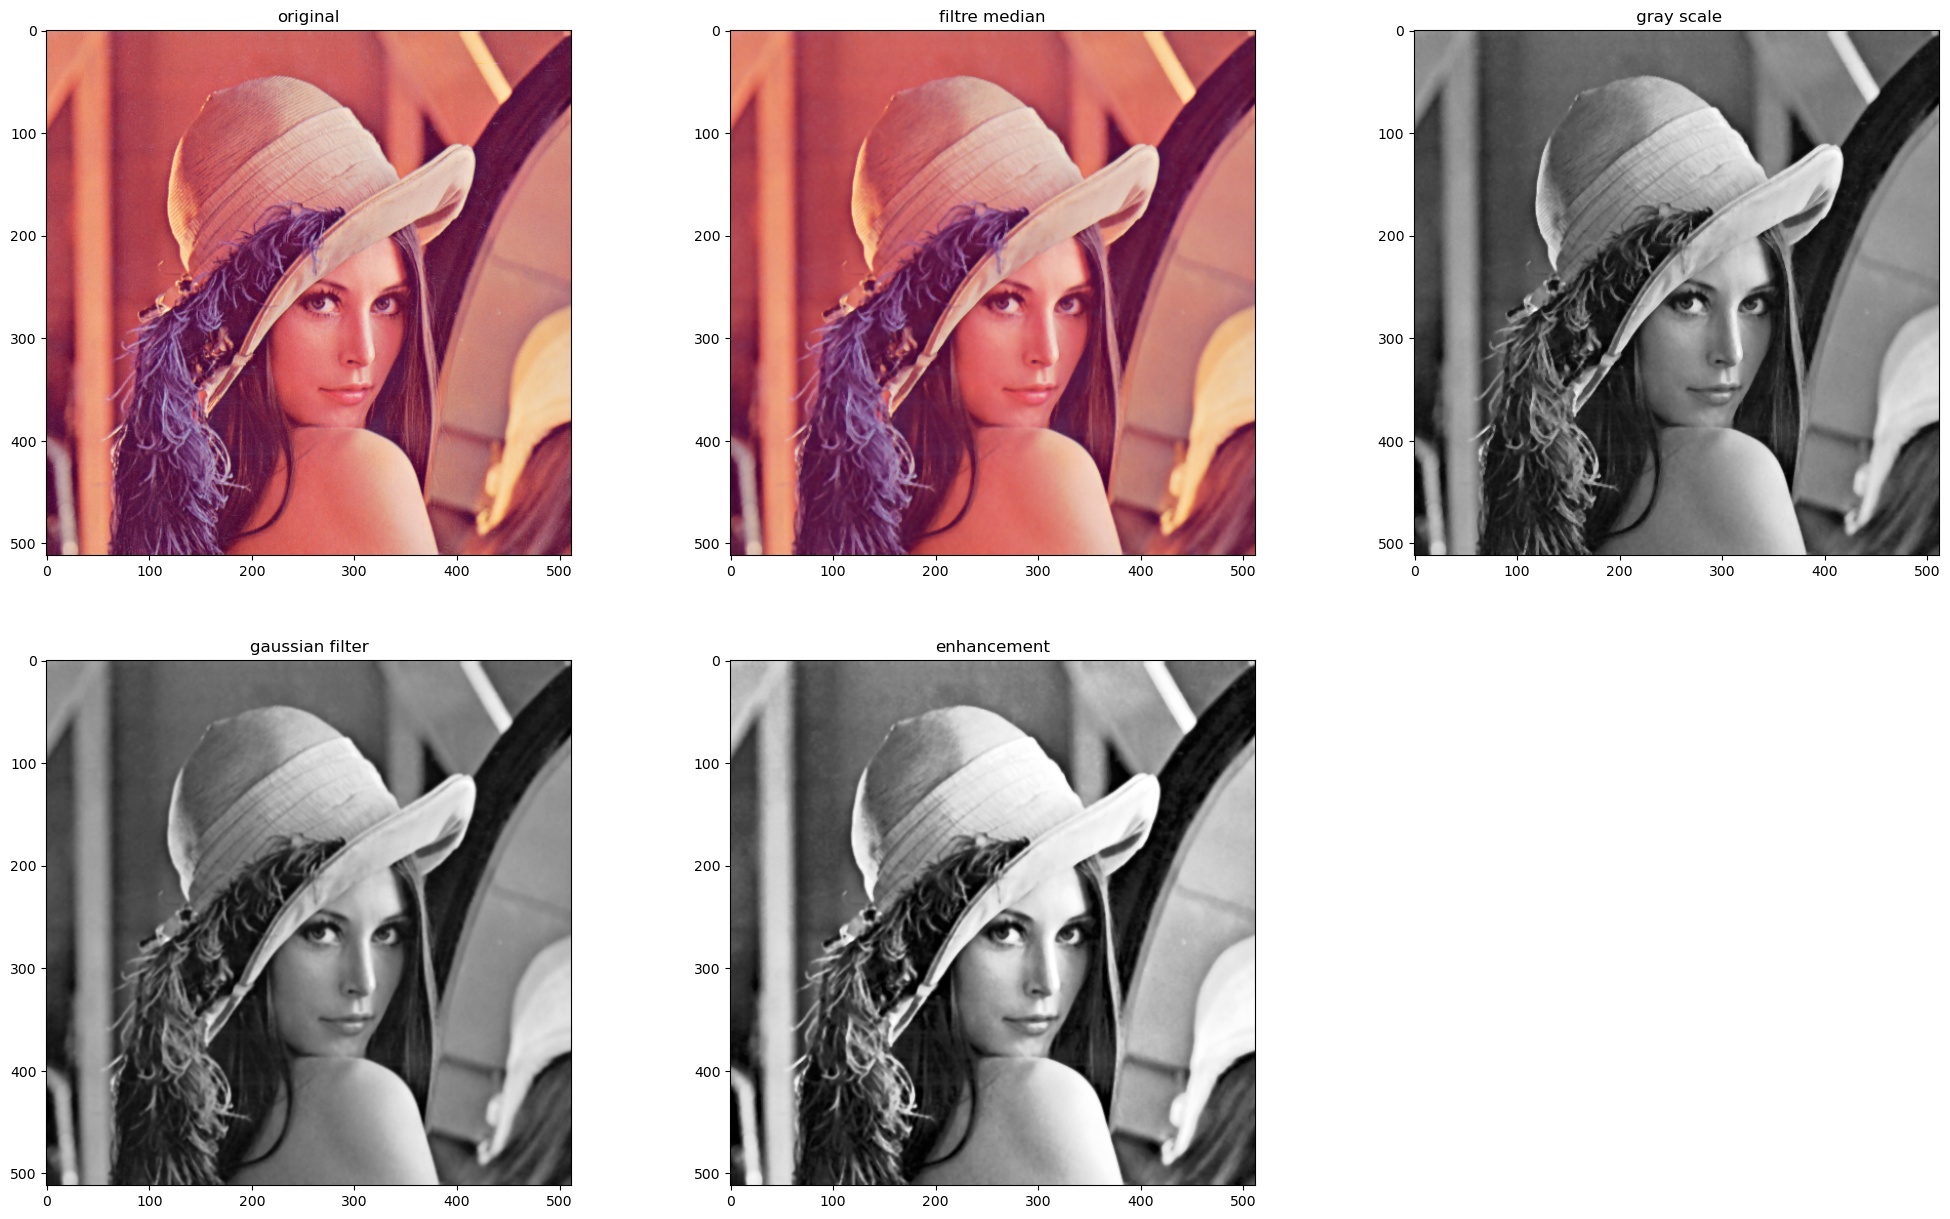

In [2]:
# image preprocessing
path= '1.png'
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img1 = cv.medianBlur(img, 3)
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.GaussianBlur(gray, (3,3), 0)
img3 = cv.equalizeHist(img2)

print(img.shape)
print(gray.shape)

images=[img, img1, gray, img2, img3]
titles=['original','filtre median',' gray scale','gaussian filter','enhancement']

plt.figure(figsize=(25,15))
for i,j,k in zip (range(1,6), images, titles):
    plt.subplot(2,3,i)
    plt.imshow(j, cmap='gray')
    plt.title(k)
plt.show()

In [3]:
gray

array([[144, 144, 144, ..., 150, 134, 108],
       [144, 144, 144, ..., 150, 134, 108],
       [144, 144, 144, ..., 150, 134, 108],
       ...,
       [ 40,  41,  44, ...,  83,  85,  84],
       [ 39,  40,  44, ...,  85,  86,  87],
       [ 39,  39,  46, ...,  85,  87,  89]], dtype=uint8)

[[218 201 172 172]]


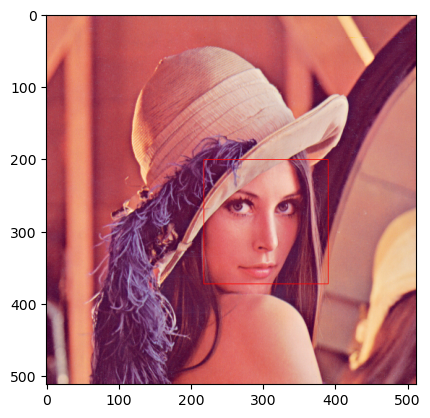

In [4]:
# Cascade Classifier
#face_casc = cv.CascadeClassifier('haarcascade_frontalface_alt2.xml') 
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray)
print(faces)
if not (len(faces)==0) :
    for(x,y,w,h) in faces : 
        imgf = cv.rectangle(img,(x,y),(x+w, y+h), (255,0,0))  
        plt.imshow(imgf, cmap='gray')
else : print(" There is no faces in the image")

In [5]:
cv.data.haarcascades

'c:\\Users\\dell\\miniconda3\\lib\\site-packages\\cv2\\data\\'

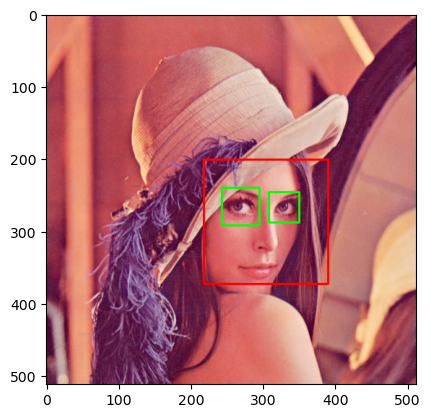

In [6]:
face_detector=cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_detector = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
    img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_detector.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(imgf, cmap='gray')